In [30]:
import pandas as pd
import numpy as np
import math
import json
from matplotlib import pyplot as plt
import datetime

% matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9) 


pd.options.display.float_format = "{:.2f}".format


# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

Check the different types of offers and how is the data modeled

In [31]:

offers = portfolio.offer_type.unique()
len(offers)

3

In [32]:
bogo = portfolio.loc[portfolio['offer_type'] == offers[0]]
bogo

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5


In [33]:
informational = portfolio.loc[portfolio['offer_type'] == offers[1]]
informational

,channels,difficulty,duration,id,offer_type,reward
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0


In [34]:
discount = portfolio.loc[portfolio['offer_type'] == offers[2]]
discount

,channels,difficulty,duration,id,offer_type,reward
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


Saving the dataframes into images 

In [35]:
## Enter your css for the table.
css = """
<style type=\"text/css\">
table {
color: #333;
font-family: Helvetica, Arial, sans-serif;
width: 640px;
border-collapse:
collapse; 
border-spacing: 0;
}

td, th {
border: 1px solid transparent; /* No more visible border */
height: 30px;
}

th {
background: #DFDFDF; /* Darken header a bit */
font-weight: bold;
}

td {
background: #FAFAFA;
text-align: center;
}

table tr:nth-child(odd) td{
background-color: white;
}
</style>
"""

In [36]:
def DataFrame_to_image(data, css, outpuname="out", format="png"):
    '''
    For rendering a Pandas DataFrame as an image.
    data: a pandas DataFrame
    css: a string containing rules for styling the output table. This must 
         contain both the opening an closing <style> tags.
    *outputimage: filename for saving of generated image
    *format: output format, as supported by IMGKit. Default is "png"
    '''
    fn = outpuname + ".html"
    
    try:
        os.remove(fn)
    except:
        None
    text_file = open(fn, "a")
    
    # write the CSS
    text_file.write(css)
    # write the HTML-ized Pandas DataFrame
    text_file.write(data.to_html())
    text_file.close()

In [51]:
DataFrame_to_image(bogo, css, outpuname="bogo" )
DataFrame_to_image(informational, css, outpuname="informational")
DataFrame_to_image(discount, css, outpuname="discount")


# Offers

As we can see there is **3 types of offers**.

- The informational does not have any reward
- For a dificulty of 10 the bogo offer has more reward

In [38]:
profile.describe(include = 'all')


,age,became_member_on,gender,id,income
count,17000.00,17000.00,14825,17000,14825.00
unique,nan,nan,3,17000,nan
top,nan,nan,M,a3e400d45651427c822dae47cd410770,nan
freq,nan,nan,8484,1,nan
mean,62.53,20167034.23,NaN,NaN,65404.99
std,26.74,11677.50,NaN,NaN,21598.30
min,18.00,20130729.00,NaN,NaN,30000.00
25%,45.00,20160526.00,NaN,NaN,49000.00
50%,58.00,20170802.00,NaN,NaN,64000.00
75%,73.00,20171230.00,NaN,NaN,80000.00


In [39]:
# Deleting NaN values
profile = profile.dropna()

In [40]:
profile.describe(include = 'all')


,age,became_member_on,gender,id,income
count,14825.00,14825.00,14825,14825,14825.00
unique,nan,nan,3,14825,nan
top,nan,nan,M,6118ca1b782a4df0a852406b194219b2,nan
freq,nan,nan,8484,1,nan
mean,54.39,20166887.15,NaN,NaN,65404.99
std,17.38,11885.65,NaN,NaN,21598.30
min,18.00,20130729.00,NaN,NaN,30000.00
25%,42.00,20160520.00,NaN,NaN,49000.00
50%,55.00,20170802.00,NaN,NaN,64000.00
75%,66.00,20171230.00,NaN,NaN,80000.00


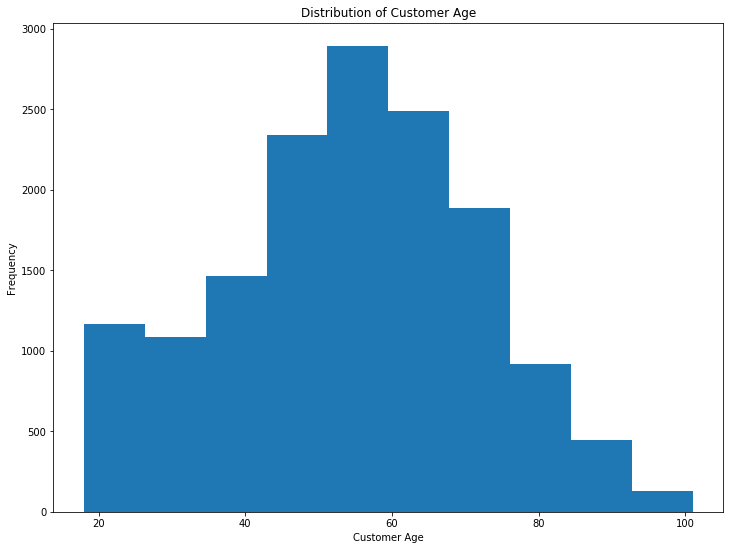

In [41]:
# Display Histogram of Customer Age
user_age = profile['age'].plot(kind='hist',title='Distribution of Customer Age')
user_age.set_xlabel("Customer Age")

plt.savefig('img/customer_age.png')

plt.figure()

In [42]:

# Get for how long a user has been a client
# it is assumed to do the calculus that the last day is the last day of the dataset
maxtime = profile['became_member_on'].max() + 1

date_time_obj = datetime.datetime.strptime(str(maxtime), '%Y%m%d').date()
profile['user_day'] = date_time_obj - pd.to_datetime(profile['became_member_on'], format='%Y%m%d').dt.date
profile['user_day'] = profile['user_day'].dt.days



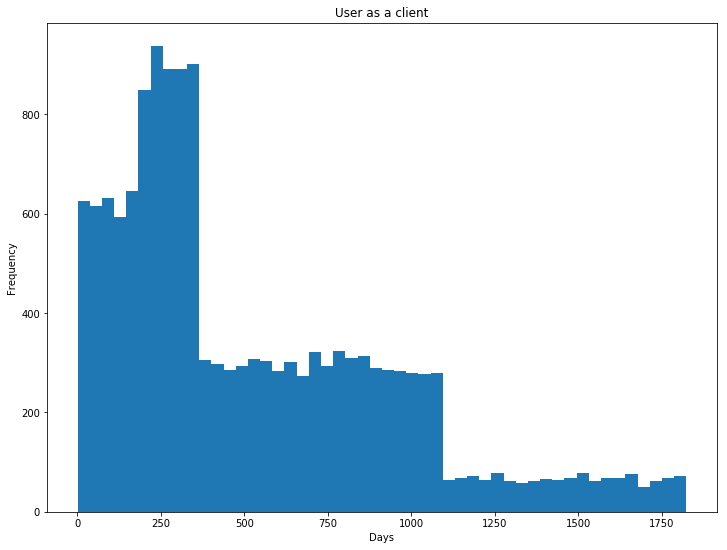

In [43]:
# Display the distribution of registered users by time
memberdays = profile['user_day'].plot(kind='hist', bins=50, title='User as a client')
memberdays.set_xlabel("Days")
plt.savefig('img/user_as_client.png')


plt.figure()


In [47]:
profile.describe()

,age,became_member_on,income,user_day
count,14825.00,14825.00,14825.00,14825.00
mean,54.39,20166887.15,65404.99,523.48
std,17.38,11885.65,21598.30,419.21
min,18.00,20130729.00,30000.00,1.00
25%,42.00,20160520.00,49000.00,209.00
50%,55.00,20170802.00,64000.00,359.00
75%,66.00,20171230.00,80000.00,798.00
max,101.00,20180726.00,120000.00,1824.00


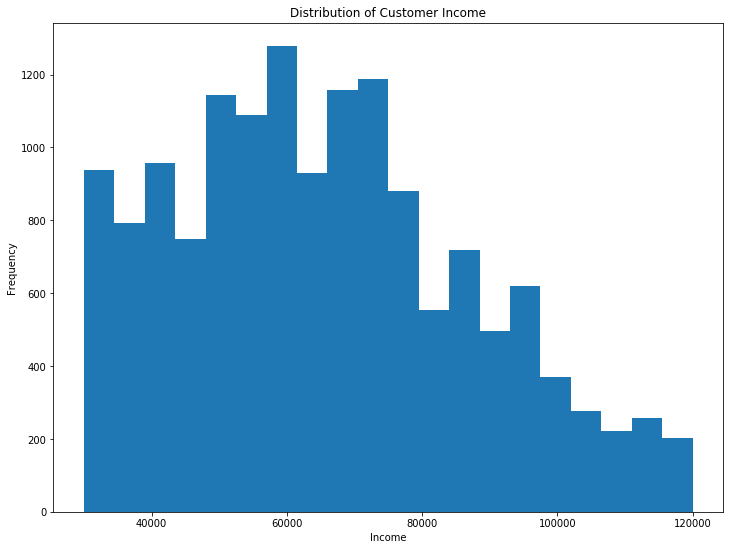

In [44]:
# Display Histogram of User Income
user_income = profile['income'].plot(kind='hist', bins=20, title='Distribution of Customer Income')
user_income.set_xlabel("Income")
plt.savefig('img/user_income.png')

plt.figure()

# Profile

- There is **17k** unique users on the dataset
- We do not have info about gender and income in 2175 users
- There are users from **18 to 101** years old.
- The first user was logged on **2013/07/29** and the last one on **2018/07/26**
- There are 2143 more men than women
- The users income is between 30k and 120k with a mean of **65404.99**


# Transcript

There is an unconsistency in the json "ofer id" sometimes it appears a "offer_id" and sometimes "offer id" so we have to clean that

In [13]:
clean_transcript = transcript.copy()
clean_transcript["offer_id"] = clean_transcript['value'].apply(lambda x: x['offer id'] if ('offer id' in x) else x['offer_id'] if ('offer_id' in x) else -1)

In [14]:
clean_transcript[clean_transcript['person']=='0009655768c64bdeb2e877511632db8f']

,event,person,time,value,offer_id
55972,offer received,0009655768c64bdeb2e877511632db8f,168,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},5a8bc65990b245e5a138643cd4eb9837
77705,offer viewed,0009655768c64bdeb2e877511632db8f,192,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},5a8bc65990b245e5a138643cd4eb9837
89291,transaction,0009655768c64bdeb2e877511632db8f,228,{'amount': 22.16},-1
113605,offer received,0009655768c64bdeb2e877511632db8f,336,{'offer id': '3f207df678b143eea3cee63160fa8bed'},3f207df678b143eea3cee63160fa8bed
139992,offer viewed,0009655768c64bdeb2e877511632db8f,372,{'offer id': '3f207df678b143eea3cee63160fa8bed'},3f207df678b143eea3cee63160fa8bed
153401,offer received,0009655768c64bdeb2e877511632db8f,408,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d
168412,transaction,0009655768c64bdeb2e877511632db8f,414,{'amount': 8.57},-1
168413,offer completed,0009655768c64bdeb2e877511632db8f,414,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,f19421c1d4aa40978ebb69ca19b0e20d
187554,offer viewed,0009655768c64bdeb2e877511632db8f,456,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d
204340,offer received,0009655768c64bdeb2e877511632db8f,504,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4


In [15]:
a = clean_transcript[(clean_transcript['person']=='0009655768c64bdeb2e877511632db8f') & (clean_transcript['offer_id']=='f19421c1d4aa40978ebb69ca19b0e20d')]

a.shape[0]

3

# User-Ofer matrix

A matrix with the correlation of the user and the offers recived, viewed, completed and real_completed is made

This matrix get the information of the transcript and encode how much times a user has recived, view or completed an offer

A real_complete column is added because an user can complete an offer without seing it, so in order to get a value in the real_complete column the user had to recived, viewed and complete an offer in that order

In [154]:
def get_timeline_results(timeline):
     """
        Get the number of recived, viewed, completed and real_completed offer for an user-offer tuple
        Use the input parameters to help define the layers of your model.
        :param timeline: the transcript order by time for an user-offer tuple
        
    """
    # Get recived, viewed, completed 
    recived = timeline[timeline['event']=='offer received']
    viewed = timeline[timeline['event']=='offer viewed']
    complete = timeline[timeline['event']=='offer completed']
    real_complete = 0
    # Check if a completed offer is real completed
    for i in range(recived.shape[0]):
        try:
            if recived["time"].values[i] <= viewed["time"].values[i] <= complete["time"].values[i]:
                real_complete += 1
        except:
            pass
    return recived.shape[0], viewed.shape[0], complete.shape[0], real_complete


def get_offers_for_users(users, transcript, offers):
     """
    Get a matrix with user-offer and recived, viewed, completed and real_completed 
    Use the input parameters to help define the layers of your model.
    :param users: user id
    :param transcript: data of all the transcripts
    :param offers: data of all the offers
    """
    column_list = ['user_id', 'offer_id', "recived", "viewed", "complete", "real_complete"]
    df = pd.DataFrame(columns=column_list) 
    
    for user in users:
        for offer in offers:
            timeline = transcript[(transcript['person']==user) & (transcript['offer_id']==offer)]
            if not timeline.empty:
                total_count = get_timeline_results(timeline)
                a = [user] + [offer] + list(total_count)
                c =  pd.DataFrame([a], columns=column_list)
                df = df.append( pd.DataFrame(c, columns=column_list))
    return df


In [155]:
%%time
'''
CPU times: user 2h 35min 53s, sys: 5.13 s, total: 2h 35min 58s
Wall time: 2h 37min 5s
'''
user_ofer_matrix = get_offers_for_users(profile["id"], clean_transcript, offers_id)

CPU times: user 2h 35min 53s, sys: 5.13 s, total: 2h 35min 58s
Wall time: 2h 37min 5s


In [156]:
user_ofer_matrix.head()

,user_id,offer_id,recived,viewed,complete,real_complete
0,0610b486422d4921ae7d2bf64640c50b,3f207df678b143eea3cee63160fa8bed,1,0,0,0
0,0610b486422d4921ae7d2bf64640c50b,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,1,0
0,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,1
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,1
0,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837,1,1,0,0


In [157]:
user_ofer_matrix.to_pickle("./user_ofer_matrix.pkl")

In [49]:
user_ofer_matrix = pd.read_pickle("./user_ofer_matrix.pkl")
user_ofer_matrix_h = user_ofer_matrix.head()

In [50]:
DataFrame_to_image(user_ofer_matrix_h, css, outpuname="user_ofer_matrix" )
